## IMDB /TMDB Notebook


In this notebook, we will use data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to gain insight on how the new Microsoft Movie studio should proceed in content creation to maximize ratings, reviews, and profit. The data we are using is important and helpful to this case because the information within the data can help us narrow down which genres of movies were well received and yielded higher ratings and grossed higher earnings.

So it looks like we need to join/merge the different tables so we can get the names/ratings/reviews etc matching

ratings with titles on tconstant

once we have the titles we can join the other sets that have the movie names

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls

ev_imdb_tmdb_notebook.ipynb
project_notebook_ajc.ipynb


## Importing Data

In [4]:
imdb_ratings = pd.read_csv('../zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
imdb_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
imdb_name_basics = pd.read_csv('../zippeddata/imdb.name.basics.csv.gz')
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [7]:
imdb_principals = pd.read_csv('../zippeddata/imdb.title.principals.csv.gz')
imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [8]:
imdb_akas = pd.read_csv('../zippeddata/imdb.title.akas.csv.gz')
imdb_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [9]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)
imdb_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [10]:
imdb_crew = pd.read_csv('../zippedData/imdb.title.crew.csv.gz')
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [11]:
tmdb_movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies = tmdb_movies.drop('id', axis=1)
tmdb_movies

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## Merging Ratings Dataset with Titles

In [12]:
imdb_df = pd.merge(imdb_ratings, imdb_akas, on='tconst', how='inner')
imdb_df.head()

,tconst,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,1,Just Inès,NaN,NaN,original,NaN,1.0
1,tt1042974,6.4,20,2,Samo Ines,RS,NaN,imdbDisplay,NaN,0.0
2,tt1042974,6.4,20,3,Just Inès,GB,NaN,NaN,NaN,0.0
3,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,NaN,original,NaN,1.0
4,tt1043726,4.2,50352,11,Hércules - A Lenda Começa,PT,NaN,imdbDisplay,NaN,0.0


## Filtering out duplicated/foreign names


We made the decision to select the US region to get the standard American title

In [66]:
imdb_df = imdb_df.sort_values(by='averagerating', ascending=False)
imdb_df = imdb_df[imdb_df['region'] == 'US']
imdb_df = imdb_df[imdb_df['attributes'] != 'fake working title']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal short title']
imdb_df = imdb_df[imdb_df['attributes'] != 'promotional title']
imdb_df = imdb_df[imdb_df['types'] != 'working']
imdb_df = imdb_df[imdb_df['attributes'] != 'IMAX version']
imdb_df = imdb_df[imdb_df['attributes'] != 'poster title']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal title']
imdb_df = imdb_df[imdb_df['attributes'] != '3-D version']
imdb_df = imdb_df[imdb_df['attributes'] != 'director\'s cut']
imdb_df = imdb_df[imdb_df['attributes'] != 'alternative spelling']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal alternative title']
imdb_df = imdb_df[imdb_df['attributes'] != 'long title']
imdb_df = imdb_df[imdb_df['attributes'] != 'short title']
imdb_df = imdb_df[imdb_df['types'] != 'alternative']
imdb_df = imdb_df.sort_values(by='language', ascending =True)
imdb_df = imdb_df.sort_values(by='numvotes', ascending=False)
imdb_df

,tconst,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
226156,tt1375666,8.8,1841066,8,Inception,US,en,NaN,NaN,0.0
226128,tt1375666,8.8,1841066,24,Inception,US,NaN,imdbDisplay,NaN,0.0
89785,tt0816692,8.6,1299334,2,Interstellar,US,en,NaN,NaN,0.0
89768,tt0816692,8.6,1299334,14,Interstellar,US,NaN,NaN,NaN,0.0
137305,tt1853728,8.4,1211405,11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
5985,tt1737074,6.6,5,1,A Jazzman's Jazzman: The Gerry Carruthers Story,US,NaN,NaN,NaN,0.0
168211,tt3908356,6.6,5,1,Death 2 Hipsters,US,NaN,NaN,NaN,0.0
121140,tt5684662,6.6,5,1,Two Guns and a Body Bag,US,NaN,NaN,NaN,0.0
187022,tt3904112,6.6,5,1,Listening to Rain,US,NaN,NaN,NaN,0.0


In [14]:
imdb_df = imdb_df.drop_duplicates(subset=['tconst'], keep='first')
imdb_df

,tconst,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,1,Just Inès,NaN,NaN,original,NaN,1.0
3,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,NaN,original,NaN,1.0
34,tt1060240,6.5,21,1,Até Onde?,PT,NaN,NaN,NaN,0.0
35,tt1069246,6.2,326,1,Un té en La Habana,VE,NaN,working,NaN,0.0
39,tt1094666,7.0,1613,1,A kalapács,HU,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
261789,tt9642950,6.0,22,1,Dar Khoongah,IR,fa,NaN,alternative spelling,0.0
261792,tt9643092,6.3,12,1,Gold Carrier,NaN,NaN,original,NaN,1.0
261794,tt9690762,5.6,37,1,On the Balcony,NaN,NaN,NaN,NaN,0.0
261798,tt9691896,6.3,21,1,Да се разкриеш,BG,bg,NaN,NaN,0.0


## Merging the Movies Database to our IMDB dataframe on Title

Here we merged the two different datasets to get the other information to match in the table

In [16]:
imdb_df = pd.merge(imdb_df, tmdb_movies, on='title', how='inner')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16392 entries, 0 to 16391
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               16392 non-null  object 
 1   averagerating        16392 non-null  float64
 2   numvotes             16392 non-null  int64  
 3   ordering             16392 non-null  int64  
 4   title                16392 non-null  object 
 5   region               12911 non-null  object 
 6   language             978 non-null    object 
 7   types                5532 non-null   object 
 8   attributes           245 non-null    object 
 9   is_original_title    16392 non-null  float64
 10  genre_ids_x          16392 non-null  object 
 11  original_language_x  16392 non-null  object 
 12  original_title_x     16392 non-null  object 
 13  popularity_x         16392 non-null  float64
 14  release_date_x       16392 non-null  object 
 15  vote_average_x       16392 non-null 

** see what data was lost and try to find pattern in what was lost

## Dropping Duplicates

In [72]:
imdb_df = imdb_df.drop_duplicates(subset=['tconst'], keep='first')
imdb_df = imdb_df.drop_duplicates(subset=['title'], keep='first')

In [18]:
imdb_df.keys()

Index(['tconst', 'averagerating', 'numvotes', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'is_original_title', 'genre_ids_x',
       'original_language_x', 'original_title_x', 'popularity_x',
       'release_date_x', 'vote_average_x', 'vote_count_x', 'genre_ids_y',
       'original_language_y', 'original_title_y', 'popularity_y',
       'release_date_y', 'vote_average_y', 'vote_count_y'],
      dtype='object')

In [75]:
imdb_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10383 entries, 0 to 12740
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               10383 non-null  object 
 1   averagerating        10383 non-null  float64
 2   numvotes             10383 non-null  int64  
 3   ordering             10383 non-null  int64  
 4   title                10383 non-null  object 
 5   region               10383 non-null  object 
 6   language             91 non-null     object 
 7   types                1448 non-null   object 
 8   attributes           227 non-null    object 
 9   is_original_title    10383 non-null  float64
 10  Unnamed: 0_x         10383 non-null  int64  
 11  genre_ids_x          10383 non-null  object 
 12  id_x                 10383 non-null  int64  
 13  original_language_x  10383 non-null  object 
 14  original_title_x     10383 non-null  object 
 15  popularity_x         10383 non-null 

## Dropping extra columns

In [20]:
imdb_df = imdb_df.drop(['original_title_y', 'attributes', 'types'], axis=1)

In [21]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16392 entries, 0 to 16391
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               16392 non-null  object 
 1   averagerating        16392 non-null  float64
 2   numvotes             16392 non-null  int64  
 3   ordering             16392 non-null  int64  
 4   title                16392 non-null  object 
 5   region               12911 non-null  object 
 6   language             978 non-null    object 
 7   is_original_title    16392 non-null  float64
 8   genre_ids_x          16392 non-null  object 
 9   original_language_x  16392 non-null  object 
 10  original_title_x     16392 non-null  object 
 11  popularity_x         16392 non-null  float64
 12  release_date_x       16392 non-null  object 
 13  vote_average_x       16392 non-null  float64
 14  vote_count_x         16392 non-null  int64  
 15  genre_ids_y          16392 non-null 

In [22]:
imdb_df = imdb_df.drop('language', axis=1)
imdb_df

,tconst,averagerating,numvotes,ordering,title,region,is_original_title,genre_ids_x,original_language_x,original_title_x,popularity_x,release_date_x,vote_average_x,vote_count_x,genre_ids_y,original_language_y,popularity_y,release_date_y,vote_average_y,vote_count_y
0,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,1.0,"[28, 12]",en,The Legend of Hercules,13.754,2014-01-10,4.5,805,"[28, 12]",en,13.754,2014-01-10,4.5,805
1,tt1270291,5.8,5728,10,Hunter Prey,NaN,1.0,"[878, 53]",en,Hunter Prey,3.738,2010-05-01,5.6,51,"[878, 53]",en,3.738,2010-05-01,5.6,51
2,tt1283887,5.4,2527,1,Burning Palms,NaN,1.0,"[35, 18, 10751]",en,Burning Palms,2.883,2010-04-23,5.6,27,"[35, 18, 10751]",en,2.883,2010-04-23,5.6,27
3,tt1285219,3.4,387,1,Ghosts Don't Exist,US,0.0,"[27, 53]",en,Ghosts Don't Exist,1.703,2010-01-01,4.1,5,"[27, 53]",en,1.703,2010-01-01,4.1,5
4,tt1343110,2.5,345,1,Speed-Dating,US,0.0,"[35, 18, 10749, 53]",en,Speed-Dating,1.400,2010-01-01,3.1,6,"[35, 18, 10749, 53]",en,1.400,2010-01-01,3.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16387,tt8439854,6.6,7691,1,Lust Stories,IN,0.0,"[18, 10749]",hi,Lust Stories,7.811,2018-06-15,6.6,46,"[18, 10749]",hi,7.811,2018-06-15,6.6,46
16388,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,[],en,Death of a Nation,0.600,2010-06-27,6.5,1,[],en,0.600,2010-06-27,6.5,1
16389,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,[],en,Death of a Nation,0.600,2010-06-27,6.5,1,"[99, 36]",en,2.254,2018-08-03,5.5,12
16390,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,"[99, 36]",en,Death of a Nation,2.254,2018-08-03,5.5,12,[],en,0.600,2010-06-27,6.5,1


In [23]:
imdb_df.describe()

,averagerating,numvotes,ordering,is_original_title,popularity_x,vote_average_x,vote_count_x,popularity_y,vote_average_y,vote_count_y
count,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000
mean,5.921822,4753.583638,1.693997,0.198939,2.932109,5.768631,166.149036,2.932109,5.768631,166.149036
std,1.444242,31203.935488,2.400978,0.399214,3.989803,1.812935,864.093307,3.989803,1.812935,864.093307
min,1.100000,5.000000,1.000000,0.000000,0.600000,0.000000,1.000000,0.600000,0.000000,1.000000
25%,4.900000,40.000000,1.000000,0.000000,0.600000,4.800000,2.000000,0.600000,4.800000,2.000000
50%,6.100000,169.000000,1.000000,0.000000,1.307000,5.900000,5.000000,1.307000,5.900000,5.000000
75%,7.000000,657.000000,1.000000,0.000000,3.427000,7.000000,26.000000,3.427000,7.000000,26.000000
max,9.700000,820847.000000,10.000000,1.000000,80.773000,10.000000,20175.000000,80.773000,10.000000,20175.000000


In [24]:
imdb_df['is_original_title'].value_counts()

0.0    13131
1.0     3261
Name: is_original_title, dtype: int64

In [25]:
imdb_df['numvotes'].mean()

4753.583638360175

## Initial Exploration of Correlations and Visualizations

In [26]:
imdb_df.corr()

,averagerating,numvotes,ordering,is_original_title,popularity_x,vote_average_x,vote_count_x,popularity_y,vote_average_y,vote_count_y
averagerating,1.000000,0.100131,0.081662,-0.090955,0.050239,0.400200,0.068997,0.050239,0.400200,0.068997
numvotes,0.100131,1.000000,0.451827,0.011925,0.438464,0.072903,0.591530,0.438464,0.072903,0.591530
ordering,0.081662,0.451827,1.000000,0.018642,0.394557,0.070332,0.244202,0.394557,0.070332,0.244202
is_original_title,-0.090955,0.011925,0.018642,1.000000,0.036408,-0.017113,-0.016769,0.036408,-0.017113,-0.016769
popularity_x,0.050239,0.438464,0.394557,0.036408,1.000000,0.102993,0.681310,0.750740,0.086027,0.504188
vote_average_x,0.400200,0.072903,0.070332,-0.017113,0.102993,1.000000,0.104022,0.086027,0.826002,0.083587
vote_count_x,0.068997,0.591530,0.244202,-0.016769,0.681310,0.104022,1.000000,0.504188,0.083587,0.735481
popularity_y,0.050239,0.438464,0.394557,0.036408,0.750740,0.086027,0.504188,1.000000,0.102993,0.681310
vote_average_y,0.400200,0.072903,0.070332,-0.017113,0.086027,0.826002,0.083587,0.102993,1.000000,0.104022
vote_count_y,0.068997,0.591530,0.244202,-0.016769,0.504188,0.083587,0.735481,0.681310,0.104022,1.000000


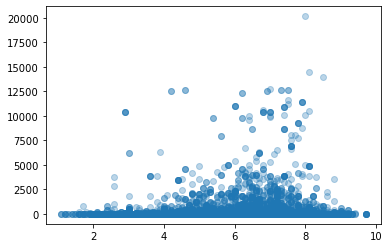

In [28]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['averagerating'], imdb_df['vote_count_y'], alpha=.3)

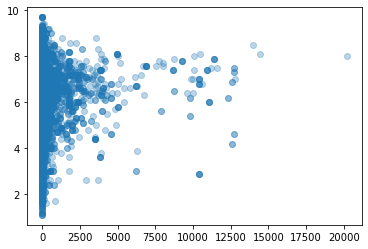

In [29]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['vote_count_y'], imdb_df['averagerating'], alpha=.3)

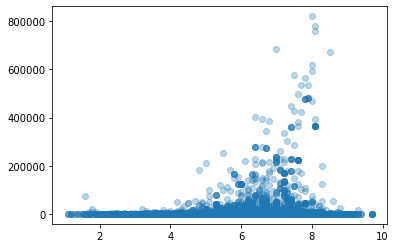

In [30]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['averagerating'], imdb_df['numvotes'], alpha=.3)

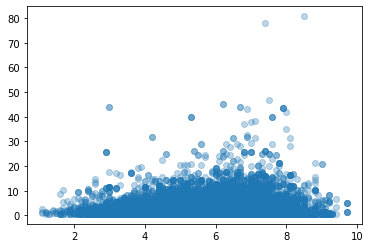

In [32]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['averagerating'], imdb_df['popularity_y'], alpha=.3)

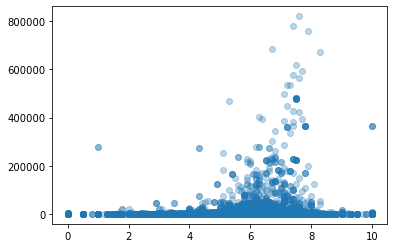

In [33]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['vote_average_y'], imdb_df['numvotes'], alpha=.3)

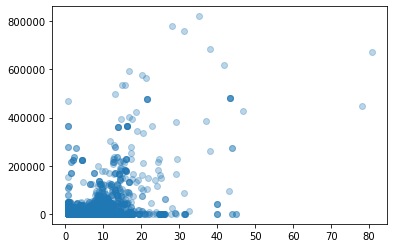

In [34]:
fig, ax = plt.subplots()
ax.scatter(imdb_df['popularity_y'], imdb_df['numvotes'], alpha=.3)

In [35]:
imdb_df['release_date'] = pd.to_datetime(imdb_df['release_date_y'])
groupbys = imdb_df.groupby('averagerating').mean()
groupbys.sort_values(by='averagerating', ascending=False)

,numvotes,ordering,is_original_title,popularity_x,vote_average_x,vote_count_x,popularity_y,vote_average_y,vote_count_y
averagerating,,,,,,,,,
9.7,15.500000,1.0,0.000000,3.187500,8.000000,7.500000,3.187500,8.000000,7.500000
9.4,314.000000,1.0,0.333333,3.443667,7.266667,45.333333,3.443667,7.266667,45.333333
9.3,2894.833333,1.0,0.333333,0.738333,4.383333,2.166667,0.738333,4.383333,2.166667
9.2,16.115385,1.0,0.076923,2.483154,6.942308,59.461538,2.483154,6.942308,59.461538
9.1,62.708333,1.0,0.000000,1.650542,6.625000,19.166667,1.650542,6.625000,19.166667
...,...,...,...,...,...,...,...,...,...
1.5,264.666667,1.0,0.000000,1.303333,2.266667,5.000000,1.303333,2.266667,5.000000
1.4,296.333333,1.0,0.000000,1.491667,4.166667,4.000000,1.491667,4.166667,4.000000
1.3,252.000000,1.0,0.500000,0.600000,1.000000,1.500000,0.600000,1.000000,1.500000


## Combining Names and Job to IMDB to get Correlation Between Certain Names and Ratings

In [36]:
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [37]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [38]:
imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [39]:
people_df = pd.merge(imdb_principals, imdb_name_basics, on='nconst', how='inner')
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,NaN,NaN,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [40]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027912 entries, 0 to 1027911
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tconst              1027912 non-null  object 
 1   ordering            1027912 non-null  int64  
 2   nconst              1027912 non-null  object 
 3   category            1027912 non-null  object 
 4   job                 177684 non-null   object 
 5   characters          393171 non-null   object 
 6   primary_name        1027912 non-null  object 
 7   birth_year          234048 non-null   float64
 8   death_year          11843 non-null    float64
 9   primary_profession  974266 non-null   object 
 10  known_for_titles    997445 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 94.1+ MB


In [41]:
people_df.drop('birth_year', axis=1, inplace=True)
people_df.drop('death_year', axis=1, inplace=True)

In [42]:
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [43]:
people_df.drop('job', axis=1, inplace=True)
people_df.drop('characters', axis=1, inplace=True)

In [44]:
imdb_df_people_df = pd.merge(imdb_df, people_df, on='tconst', how='inner')
imdb_df_people_df

,tconst,averagerating,numvotes,ordering_x,title,region,is_original_title,genre_ids_x,original_language_x,original_title_x,...,release_date_y,vote_average_y,vote_count_y,release_date,ordering_y,nconst,category,primary_name,primary_profession,known_for_titles
0,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,1.0,"[28, 12]",en,The Legend of Hercules,...,2014-01-10,4.5,805,2014-01-10,3,nm0012078,actor,Scott Adkins,"actor,producer,stunts","tt3344680,tt1764651,tt1211837,tt6237612"
1,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,1.0,"[28, 12]",en,The Legend of Hercules,...,2014-01-10,4.5,805,2014-01-10,10,nm0503600,producer,Danny Lerner,"producer,writer,production_manager","tt1764651,tt0238552,tt1971325,tt2302755"
2,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,1.0,"[28, 12]",en,The Legend of Hercules,...,2014-01-10,4.5,805,2014-01-10,5,nm0001317,director,Renny Harlin,"producer,director,writer","tt2238032,tt0149261,tt0099423,tt0106582"
3,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,1.0,"[28, 12]",en,The Legend of Hercules,...,2014-01-10,4.5,805,2014-01-10,1,nm1553725,actor,Kellan Lutz,"actor,producer,stunts","tt1324999,tt1673434,tt1325004,tt1259571"
4,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,1.0,"[28, 12]",en,The Legend of Hercules,...,2014-01-10,4.5,805,2014-01-10,2,nm4719349,actress,Gaia Weiss,actress,"tt2447934,tt2306299,tt6015100,tt10110646"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145879,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,"[99, 36]",en,Death of a Nation,...,2018-08-03,5.5,12,2018-08-03,5,nm6583447,director,Bruce Schooley,"writer,director,producer","tt5646136,tt2785390"
145880,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,"[99, 36]",en,Death of a Nation,...,2018-08-03,5.5,12,2018-08-03,6,nm0596520,producer,Gerald R. Molen,"producer,production_manager,transportation_dep...","tt0108052,tt0119567,tt0107290,tt0095953"
145881,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,"[99, 36]",en,Death of a Nation,...,2018-08-03,5.5,12,2018-08-03,3,nm0473162,actor,Pavel Kríz,actor,"tt1229238,tt0082576,tt0138558,tt2493486"
145882,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,"[99, 36]",en,Death of a Nation,...,2018-08-03,5.5,12,2018-08-03,2,nm9976809,actress,Victoria Chilap,actress,"tt7145178,tt9663168,tt3391842,tt3095268"


## exploring category of each job type to see what names have a higher correlation to ratings## 

In [45]:
imdb_df_people_df['category'].value_counts()

actor                  34730
producer               21776
actress                21615
director               17123
composer               12260
writer                 10972
cinematographer        10619
self                    7197
editor                  6980
production_designer     2161
archive_footage          451
Name: category, dtype: int64

## people category vs ratings

Using category to find relations against top ratings

In [46]:
composer_df = imdb_df_people_df[imdb_df_people_df['category'] == 'composer']
composer_df

,tconst,averagerating,numvotes,ordering_x,title,region,is_original_title,genre_ids_x,original_language_x,original_title_x,...,release_date_y,vote_average_y,vote_count_y,release_date,ordering_y,nconst,category,primary_name,primary_profession,known_for_titles
19,tt1270291,5.8,5728,10,Hunter Prey,NaN,1.0,"[878, 53]",en,Hunter Prey,...,2010-05-01,5.6,51,2010-05-01,8,nm0387426,composer,Christopher Hoag,"composer,music_department","tt1270291,tt0368343,tt0412142,tt6186342"
24,tt1283887,5.4,2527,1,Burning Palms,NaN,1.0,"[35, 18, 10751]",en,Burning Palms,...,2010-04-23,5.6,27,2010-04-23,9,nm1853865,composer,Matthew Margeson,"composer,music_department,miscellaneous","tt1935859,tt2802144,tt1083452,tt1564585"
39,tt1285219,3.4,387,1,Ghosts Don't Exist,US,0.0,"[27, 53]",en,Ghosts Don't Exist,...,2010-01-01,4.1,5,2010-01-01,9,nm0757932,composer,James T. Sale,"music_department,composer,actor","tt1490017,tt0837562,tt1232829,tt0844471"
49,tt1343110,2.5,345,1,Speed-Dating,US,0.0,"[35, 18, 10749, 53]",en,Speed-Dating,...,2010-01-01,3.1,6,2010-01-01,7,nm3676917,composer,Evan Scot Hornsby,composer,"tt1343110,tt1540876"
55,tt1343740,4.6,495,1,Paradox,NaN,1.0,"[878, 18, 10749]",en,Paradox,...,2015-12-05,7.0,1,2015-12-05,10,nm0784955,composer,John Sereda,"composer,music_department,producer","tt1343740,tt0866432,tt0796739,tt0439410"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145806,tt7772580,6.2,13573,1,The Perfection,US,0.0,"[18, 27, 53]",en,The Perfection,...,2018-09-20,6.6,272,2018-09-20,10,nm0368248,composer,Paul Haslinger,"composer,music_department,soundtrack","tt0800325,tt2543312,tt4779020,tt0320691"
145857,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,[],en,Death of a Nation,...,2010-06-27,6.5,1,2010-06-27,7,nm0565103,composer,Dennis McCarthy,"composer,soundtrack,music_department","tt0111280,tt0244365,tt0112178,tt0092455"
145864,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,[],en,Death of a Nation,...,2018-08-03,5.5,12,2018-08-03,7,nm0565103,composer,Dennis McCarthy,"composer,soundtrack,music_department","tt0111280,tt0244365,tt0112178,tt0092455"
145871,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,"[99, 36]",en,Death of a Nation,...,2010-06-27,6.5,1,2010-06-27,7,nm0565103,composer,Dennis McCarthy,"composer,soundtrack,music_department","tt0111280,tt0244365,tt0112178,tt0092455"


In [47]:
x = composer_df['primary_name'].value_counts().index
x

Index(['Gingger Shankar', 'Mowg', 'Johnny Jewel', 'Magnús Jóhann Ragnarsson',
       'Austin Wintory', 'T. Griffin', 'John Swihart', 'Philip Miller',
       'Todor Kobakov', 'Lukasz Pawel Buda',
       ...
       'Juliette Beavan', 'Joanne Higginbottom', 'Martin Thornton',
       'Nils Frahm', 'Kerri Fabian', 'Jim Frost', 'Yuki Hayashi',
       'Christopher Carlone', 'Justin Marshall Elias', 'Ralf Lichtenberg'],
      dtype='object', length=5287)

In [48]:
y = composer_df['primary_name'].value_counts()
y

Gingger Shankar             60
Mowg                        56
Johnny Jewel                54
Magnús Jóhann Ragnarsson    49
Austin Wintory              43
                            ..
Jim Frost                    1
Yuki Hayashi                 1
Christopher Carlone          1
Justin Marshall Elias        1
Ralf Lichtenberg             1
Name: primary_name, Length: 5287, dtype: int64

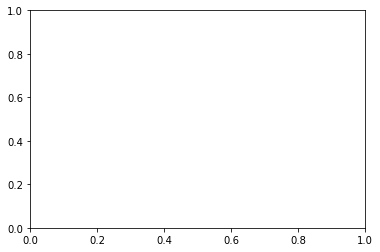

In [49]:
fig, ax = plt.subplots()